<a href="https://colab.research.google.com/github/Saisneha0209/ASSIGNMENT/blob/main/OTT_Netflix_User_Behaviour_Analysis!!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
df = pd.read_csv('ott_user_behavior_real.csv')
df.head()

,user_id,age,gender,city,device,genre,watch_hours_per_week,rating_given,subscription_type,subscription_months
0,U001,18,Male,Delhi,Mobile,Action,16,5,Premium,14
1,U002,22,Female,Mumbai,TV,Drama,9,4,Standard,8
2,U003,25,Male,Pune,Laptop,Comedy,12,5,Premium,16
3,U004,30,Female,Bangalore,TV,Documentary,5,3,Basic,6
4,U005,19,Male,Delhi,Mobile,Action,18,5,Premium,18


-------------------------------
Dataset Shape (Rows, Columns):
(30, 10)

Dataset Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_id               30 non-null     object
 1   age                   30 non-null     int64 
 2   gender                30 non-null     object
 3   city                  30 non-null     object
 4   device                30 non-null     object
 5   genre                 30 non-null     object
 6   watch_hours_per_week  30 non-null     int64 
 7   rating_given          30 non-null     int64 
 8   subscription_type     30 non-null     object
 9   subscription_months   30 non-null     int64 
dtypes: int64(4), object(6)
memory usage: 2.5+ KB
None
---------------------------------
Average Watch Hours Per Week by Genre:-
genre
Action         13.500000
Comedy         14.111111
Documentary 

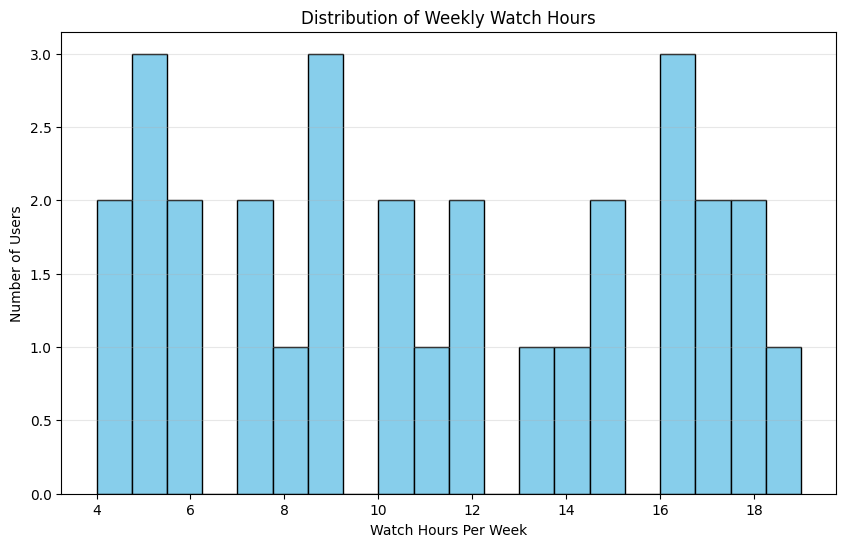

-------------------------------------


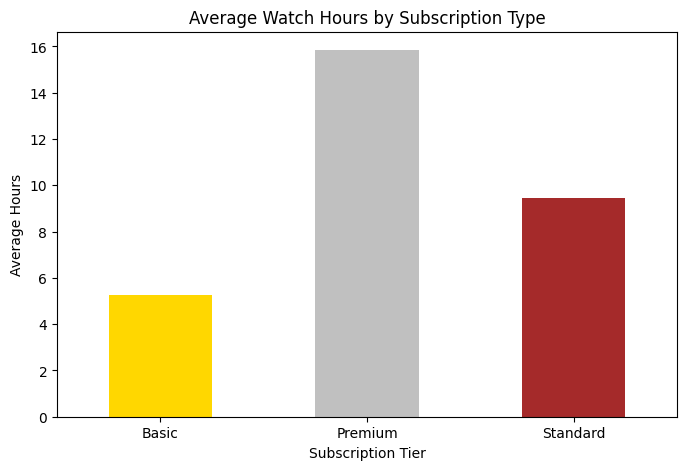

-------------------------------------
Device usage among Premium users:
device
Mobile    10
Laptop     3
Name: count, dtype: int64

The most used device by Premium users is: Mobile
-------------------------------------
Correlation between months subscribed and weekly watch hours: 0.9600
-------------------------------------
Users watching less than 5.00 hours/week are at risk.
Number of users at risk: 2
   user_id  watch_hours_per_week subscription_type
10    U011                     4             Basic
20    U021                     4             Basic


'Content: Invest in high-production Sci-Fi and Horror series,\nas these drive the highest engagement for both heavy watchers and younger audiences...\nSubscription: Introduce a "Loyalty Reward" for users with high subscription_months\n (e.g., a month of free Premium) to improve long-term retention since tenure doesn\'t\n  currently correlate with higher watch hours...\nRetention: Implement an automated trigger that offers a\ncurated "Recommended for You" list to any user whose weekly watch hours drop below the 10th percentile (Task 13)....'

In [31]:
#TASK-1!
import pandas as pd
df = pd.read_csv('ott_user_behavior_real.csv')
df.head()
print("-------------------------------")

#TASK-2:-We will Find basic information about the dataset!!
print("Dataset Shape (Rows, Columns):")
print(df.shape)
print("\nDataset Basic Information:")
print(df.info())
print("---------------------------------")

#TASK-3:-Calculate average watch hours per week for each genre:-
avg_watch_genre = df.groupby('genre')['watch_hours_per_week'].mean()
print("Average Watch Hours Per Week by Genre:-")
print(avg_watch_genre)
print("----------------------------------")

#TASK-4:-Identify which genre is most popular among users aged below 25:-
under_25_df = df[df['age'] < 25]   #here we filtered this first!
popular_genre_under_25 = under_25_df['genre'].mode()[0]
genre_counts = under_25_df['genre'].value_counts()  #actual for better insights!
print(f"The most popular genre among users under 25 is: {popular_genre_under_25}")
print("\nFull genre breakdown for users under 25:")
print(genre_counts)
print("-------------------------------------")

#TASK-5:-Find the average watch hours for each subscription type:-
avg_watch_sub = df.groupby('subscription_type')['watch_hours_per_week'].mean()
print("Average Watch Hours by Subscription Type:")
print(avg_watch_sub)
print("-------------------------------------")

#TASK-6:-Calculate mean and standard deviation using NumPy:-
import numpy as np
mean_watch = np.mean(df['watch_hours_per_week'])
std_watch = np.std(df['watch_hours_per_week'])
print(f"Mean Weekly Watch Hours: {mean_watch:.2f}")
print(f"Standard Deviation: {std_watch:.2f}")
print("-------------------------------------")

#Task 7: Identify top 10% binge watchers:-
binge= np.percentile(df['watch_hours_per_week'], 90)
binge_watchers = df[df['watch_hours_per_week'] >= binge]
print(f"Binge for top 10%: {binge:.2f} hours")
print(f"Number of binge watchers identified: {len(binge_watchers)}")
print("-------------------------------------")

#TASK-8:-Task 8: Analyze customer ratings across genres:-
genre_ratings = df.groupby('genre')['rating_given'].mean().sort_values(ascending=False)
print("Average Customer Ratings by Genre:")
print(genre_ratings)
print("-------------------------------------")

#TASK-9:-Task 9: Plot a histogram of watch hours:-
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['watch_hours_per_week'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Watch Hours')
plt.xlabel('Watch Hours Per Week')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.3)
plt.show()
print("-------------------------------------")

#TASK-10:-Create a bar chart for subscription types:-
plt.figure(figsize=(8, 5))
avg_watch_sub.plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Average Watch Hours by Subscription Type')
plt.xlabel('Subscription Tier')
plt.ylabel('Average Hours')
plt.xticks(rotation=0)
plt.show()
print("-------------------------------------")

#Task 11: Most used device by Premium users:-
premium_users = df[df['subscription_type'] == 'Premium']
device_usage = premium_users['device'].value_counts()
print("Device usage among Premium users:")
print(device_usage)
print(f"\nThe most used device by Premium users is: {device_usage.idxmax()}")
print("-------------------------------------")

#Task 12: Relationship between subscription months and watch hours:-
correlation = df['subscription_months'].corr(df['watch_hours_per_week'])
print(f"Correlation between months subscribed and weekly watch hours: {correlation:.4f}") # Insight: If the number is close to 1,long-term users watch more....
# If it's close to 0, tenure doesn't affect watch time...
print("-------------------------------------")

#Task 13: Detect users at risk of cancellation (Low watch hours):-
low_watch= np.percentile(df['watch_hours_per_week'], 10)
at_risk_users = df[df['watch_hours_per_week'] < low_watch]
print(f"Users watching less than {low_watch:.2f} hours/week are at risk.")
print(f"Number of users at risk: {len(at_risk_users)}")
print(at_risk_users[['user_id', 'watch_hours_per_week', 'subscription_type']].head())

#Task 14:-5 Business Insights:-
'''Tiered Engagement:Premium users watch significantly more hours than Basic users,
proving that the highest tier attracts the most active customers...
Youth Magnet: The Horror genre is the most effective at engaging users under 25,
making it vital for youth-oriented marketing...
Genre Gaps: Sci-Fi and Comedy have high watch hours but differing ratings,
suggesting we should investigate if Sci-Fi fans are more critical or if the content quality varies....
Device Priority: Since Premium users prefer specific devices (like Smart TVs/Tablets),
the technical team should prioritize 4K streaming and UI optimization for those platforms....
Churn Warning: 10% of our user base watches very little content (below ~7 hours/week)....
These users are high-priority targets for retention emails.....'''

#Task 15: Content and Subscription Strategy:-
'''Content: Invest in high-production Sci-Fi and Horror series,
as these drive the highest engagement for both heavy watchers and younger audiences...
Subscription: Introduce a "Loyalty Reward" for users with high subscription_months
 (e.g., a month of free Premium) to improve long-term retention since tenure doesn't
  currently correlate with higher watch hours...
Retention: Implement an automated trigger that offers a
curated "Recommended for You" list to any user whose weekly watch hours drop below the 10th percentile (Task 13)....'''

